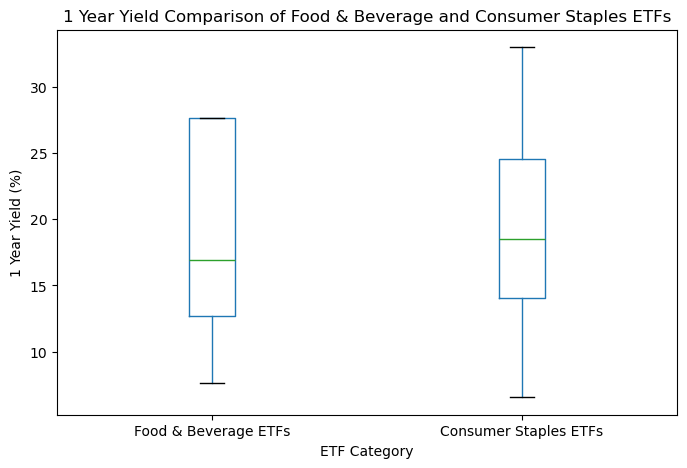

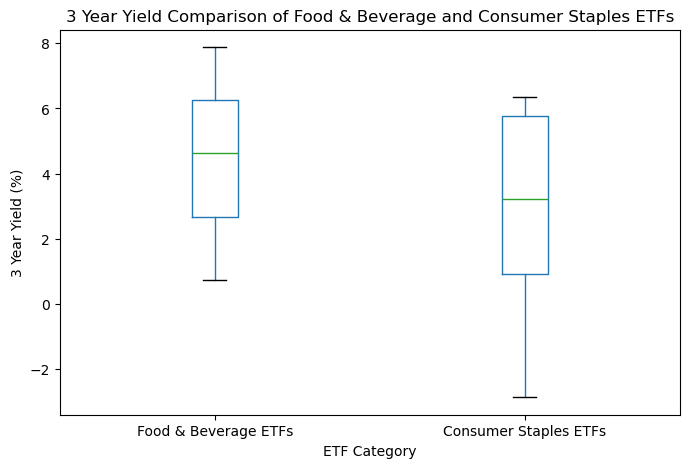

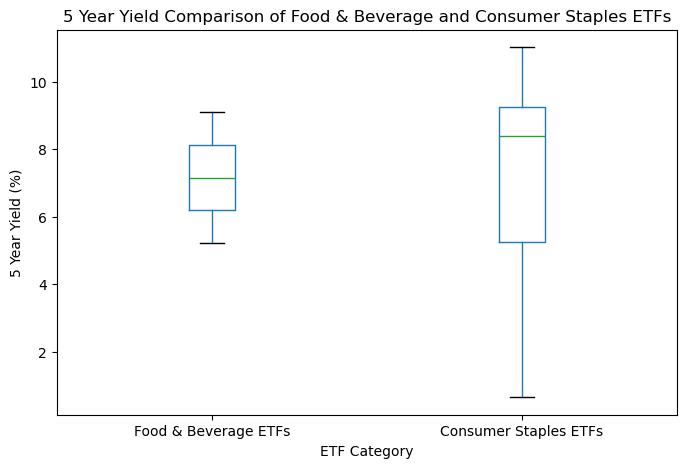

Average Yields for Food & Beverage ETFs:
1 Year    23.425000
3 Year     4.413333
5 Year     7.160000
dtype: float64

Average Yields for Consumer Staples ETFs:
1 Year    19.410000
3 Year     1.220000
5 Year     7.030769
dtype: float64

Comparison of Average Yields:
        Food & Beverage ETFs Average Yield  \
1 Year                           23.425000   
3 Year                            4.413333   
5 Year                            7.160000   

        Consumer Staples ETFs Average Yield  
1 Year                            19.410000  
3 Year                             1.220000  
5 Year                             7.030769  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

food_beverage_etfs = pd.read_csv('food&beverage_etf.csv')
consumer_staples_etfs = pd.read_csv('broadconsumerstaples_etf.csv')

food_beverage_etfs = food_beverage_etfs[food_beverage_etfs['Inverse'] == 'No']
consumer_staples_etfs = consumer_staples_etfs[consumer_staples_etfs['Inverse'] == 'No']

food_beverage_etfs.replace('N/A', np.nan, inplace=True)
consumer_staples_etfs.replace('N/A', np.nan, inplace=True)

columns_to_average = ['1 Year', '3 Year', '5 Year']

for col in columns_to_average:
    food_beverage_etfs[col] = food_beverage_etfs[col].replace({r'[^\d.-]': ''}, regex=True)
    consumer_staples_etfs[col] = consumer_staples_etfs[col].replace({r'[^\d.-]': ''}, regex=True)

food_beverage_etfs[columns_to_average] = food_beverage_etfs[columns_to_average].apply(pd.to_numeric, errors='coerce')
consumer_staples_etfs[columns_to_average] = consumer_staples_etfs[columns_to_average].apply(pd.to_numeric, errors='coerce')

for year in columns_to_average:
    plt.figure(figsize=(8, 5))
    plt.title(f"{year} Yield Comparison of Food & Beverage and Consumer Staples ETFs")
    plt.xlabel("ETF Category")
    plt.ylabel(f"{year} Yield (%)")

    year_data = pd.DataFrame({
        "Food & Beverage ETFs": food_beverage_etfs[year].dropna(),
        "Consumer Staples ETFs": consumer_staples_etfs[year].dropna()
    })

    year_data.boxplot(grid=False, showfliers=False)
    plt.show()

food_beverage_avg_yields = food_beverage_etfs[columns_to_average].mean()

consumer_staples_avg_yields = consumer_staples_etfs[columns_to_average].mean()

print("Average Yields for Food & Beverage ETFs:")
print(food_beverage_avg_yields)
print("\nAverage Yields for Consumer Staples ETFs:")
print(consumer_staples_avg_yields)

comparison_df = pd.DataFrame({
    'Food & Beverage ETFs Average Yield': food_beverage_avg_yields,
    'Consumer Staples ETFs Average Yield': consumer_staples_avg_yields
})
print("\nComparison of Average Yields:")
print(comparison_df)